## 1. Contexto del problema
El gobierno nacional está desarrollando políticas de acceso y uso de formas modernas de energía. En particular, está preocupado por el uso de leña como fuente de energía en algunas de las regiones del país.

Como parte de ese proceso, se ha identificado la necesidad de entender mejor la variabilidad en el **consumo per cápita de energía eléctrica**. En otras palabras, se quiere entender mejor **las razones por las que unas personas consumen más energía eléctrica que otras**.

Hay muchas posibes variables explicativas. Por ejemplo el clima, los ingresos, la actividad comercial, etc. Debido a la dificultad de recolectar al nivel de usuario esa información, se ha propuesto indagar las posibles explicaciones agrupadas por municipios. En esas condiciones, la pregunta por responder es: ¿Cuáles son las variables que explican que algunos municipios del país presentan un consumo de energía eléctrica per cápita muy diferente a otros?

el siguiente jupiter notebook es una EDA de los datos.
Se construyo un aplicativo para presentar mejor la informacion <https://datastudio.google.com/reporting/cfa9fc6c-2fdb-43cd-bc08-980444f09428>

## Librerias

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import date, time, datetime
import matplotlib.pyplot as plt

# DataSets

In [12]:
url = "https://raw.githubusercontent.com/ogduartev/energyDataScience/main/data/towns/sample01.csv"
url1 ="https://raw.githubusercontent.com/ogduartev/energyDataScience/main/data/towns/sample02.csv"

df_dane = pd.read_csv(url,index_col=None,decimal=".")
df_vivi = pd.read_csv(url1,index_col=None,decimal=".")

df_dane.head()


,DPTO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,IMPORTANCIA,VALOR,PESO_MPAL,CONSUMOS_CANTIDAD
0,5,5001,Antioquia,Medellín,1,54530.676210,45.505823,0
1,5,5002,Antioquia,Abejorral,5,207.327284,0.173015,0
2,5,5004,Antioquia,Abriaquí,7,21.582463,0.018011,0
3,5,5021,Antioquia,Alejandría,6,100.796517,0.084115,0
4,5,5030,Antioquia,Amagá,4,410.099686,0.342228,0


In [13]:
df_vivi.head()

,DPTO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,POB_2012,POB_2015,POB_2020,ATITUD,CLIMA,PESO
0,11,11001,Bogotá Distrito Capital,Bogotá Distrito Capital,7571345,7878783,8380801,2640,Frío,0.162539
1,5,5001,Antioquia,Medellín,2393011,2464322,2569007,1405,Templado,0.051372
2,76,76001,Valle Del Cauca,Cali,2294653,2369821,2496442,926,Cálido seco,0.049261
3,8,8001,Atlántico,Barranquilla,1200513,1218475,1239518,24,Cálido húmedo,0.025772
4,13,13001,Bolívar,Cartagena de Indias,967103,1001755,1057445,1,Cálido húmedo,0.020761


<img src=https://media.geeksforgeeks.org/wp-content/uploads/20201213140551/Screenshot16151.png>

In [14]:
df = pd.merge(df_dane, df_vivi[["MPIO_CDPMP", "POB_2012", "POB_2015", "POB_2020", "ATITUD", "CLIMA", "PESO"]], on= "MPIO_CDPMP", how='left')
df=df.set_index("MPIO_CDPMP")
df = df.sort_values('MPIO_CDPMP')
df


,DPTO_CCDGO,DPTO_CNMBR,MPIO_CNMBR,IMPORTANCIA,VALOR,PESO_MPAL,CONSUMOS_CANTIDAD,POB_2012,POB_2015,POB_2020,ATITUD,CLIMA,PESO
MPIO_CDPMP,,,,,,,,,,,,,
5001,5,Antioquia,Medellín,1,54530.676210,45.505823,0,2393011,2464322,2569007,1405,Templado,0.051372
5002,5,Antioquia,Abejorral,5,207.327284,0.173015,0,19570,19290,18779,2125,Frío,0.000420
5004,5,Antioquia,Abriaquí,7,21.582463,0.018011,0,2290,2128,1870,1920,Templado,0.000049
5021,5,Antioquia,Alejandría,6,100.796517,0.084115,0,3575,3466,3278,1650,Templado,0.000077
5030,5,Antioquia,Amagá,4,410.099686,0.342228,0,28897,29555,30561,1392,Templado,0.000620
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97889,97,Vaupés,Yavaraté,7,3.948081,0.813011,0,1251,1240,1218,97,Cálido húmedo,0.000027
99001,99,Vichada,Puerto Carreño,5,257.400063,26.318583,0,15012,15753,17031,51,Cálido húmedo,0.000322
99524,99,Vichada,La Primavera,6,131.433297,13.438762,0,13791,15342,18248,100,Cálido húmedo,0.000296


## Cálculo de la Correlación entre las Variables

C:\Users\yonat\AppData\Local\Temp\ipykernel_4008\562508368.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='pearson')


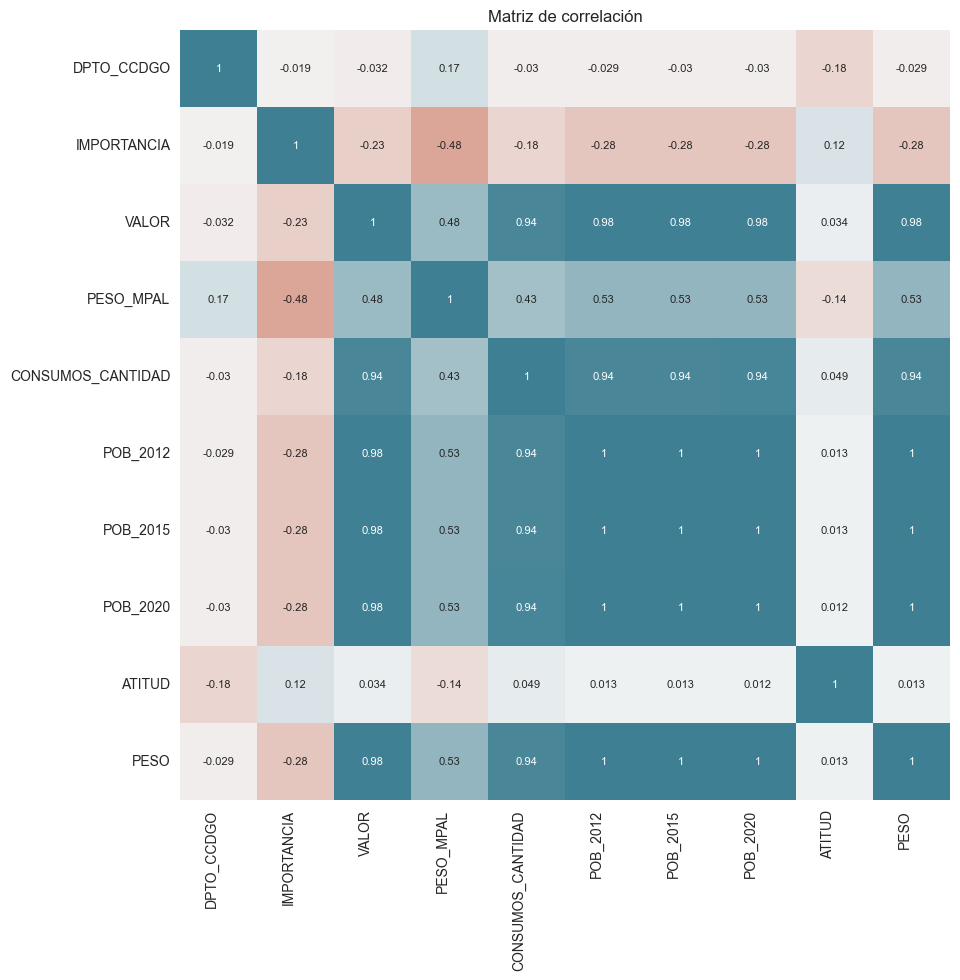

In [15]:
corr_matrix = df.corr(method='pearson')

# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_title("Matriz de correlación")
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 90,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

## Cálculo del Consumo Per Capita

In [16]:
df["Consu_PerCap_2012"]=df["CONSUMOS_CANTIDAD"]/df["POB_2012"]
df["Consu_PerCap_2015"]=df["CONSUMOS_CANTIDAD"]/df["POB_2015"]
df["Consu_PerCap_2020"]=df["CONSUMOS_CANTIDAD"]/df["POB_2020"]

# Filtro por importancia economica 
df1=df[df["IMPORTANCIA"]==1]
df2=df[(df["IMPORTANCIA"]>=2) & (df["IMPORTANCIA"]<=3)]
df3=df[(df["IMPORTANCIA"]>=4) & (df["IMPORTANCIA"]<=5)]
df4=df[(df["IMPORTANCIA"]>=6) & (df["IMPORTANCIA"]<=7)]

# df[df["IMPORTANCIA"]==7]
# df["IMPORTANCIA"].unique()

## Gráfico de Consumo de los Municipios de Importancia 1 

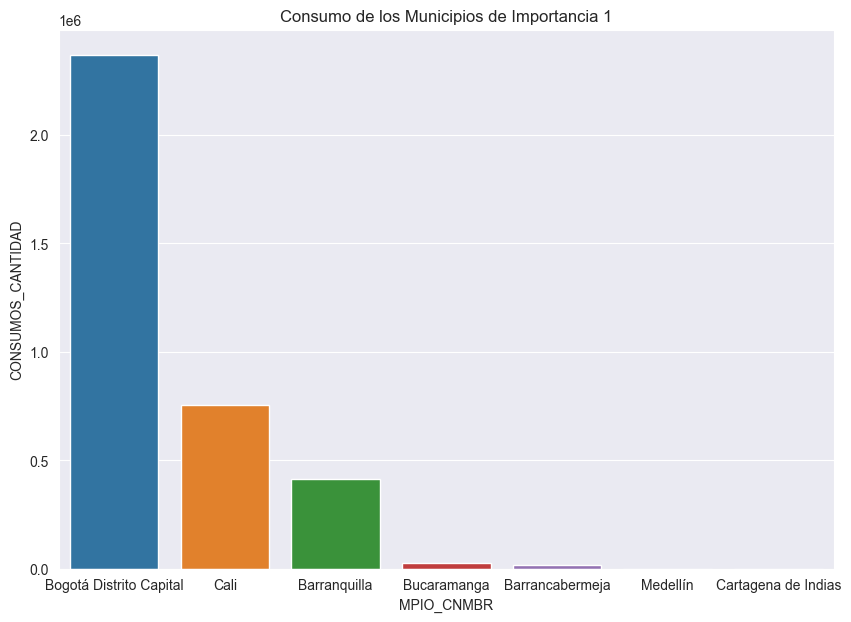

In [17]:

df1_1=df1[["MPIO_CNMBR","CONSUMOS_CANTIDAD"]]
df1_1=df1_1.groupby(["MPIO_CNMBR"]).sum().reset_index()
df1_1.sort_values(["CONSUMOS_CANTIDAD", "MPIO_CNMBR"], ascending=False, inplace=True)

fig = plt.figure(figsize =(10, 7))
sns.set_style("darkgrid")
sns.barplot(x = 'MPIO_CNMBR', y = 'CONSUMOS_CANTIDAD', data = df1_1).set(title='Consumo de los Municipios de Importancia 1');

## Gráfico de Consumo de los Municipios de Importancia 2 y 3 

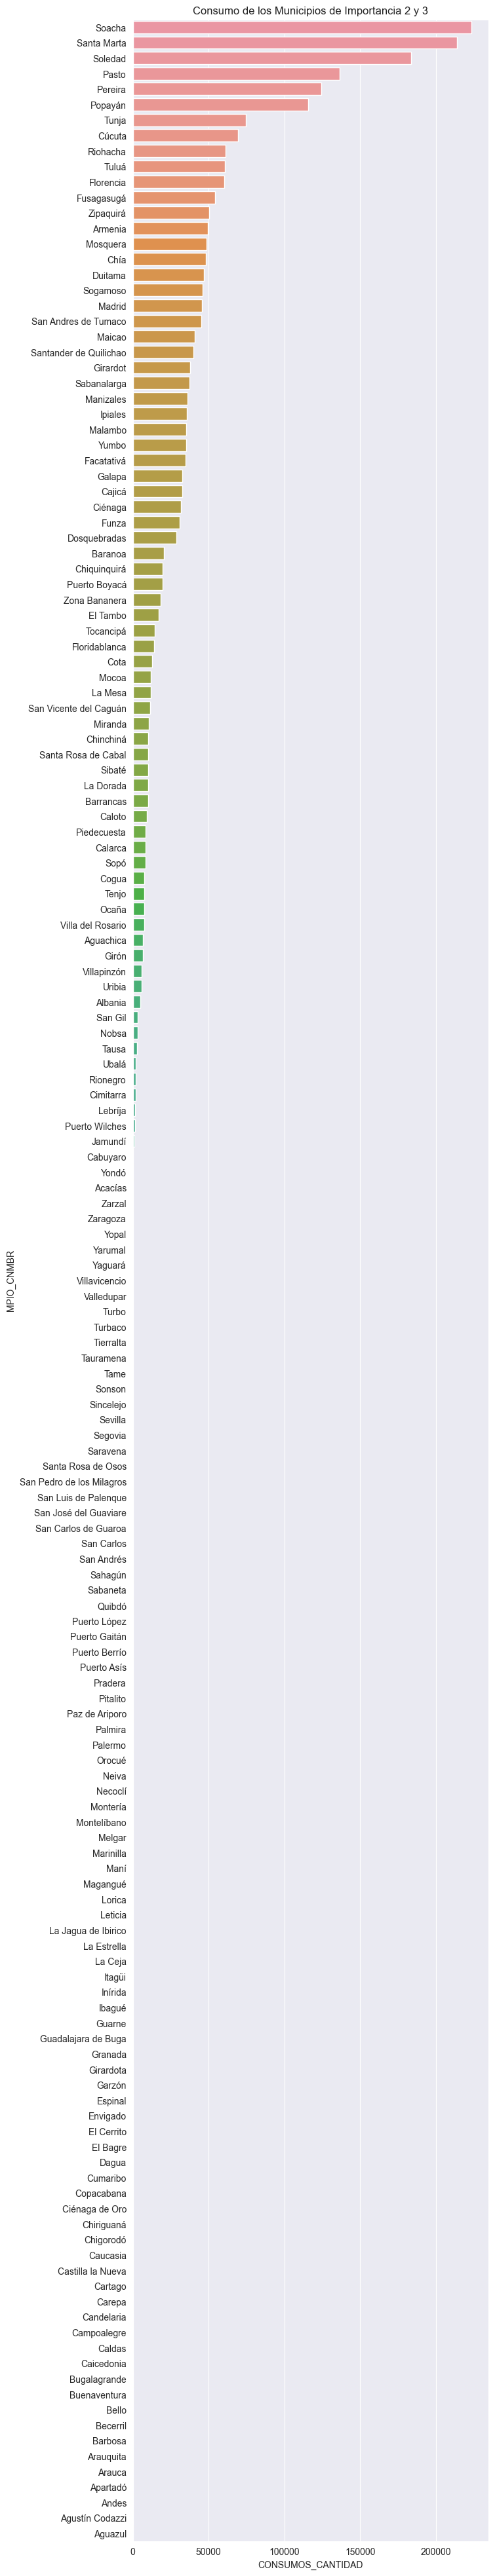

In [19]:
df2_3=df2[["MPIO_CNMBR","CONSUMOS_CANTIDAD"]]
df2_3=df2_3.groupby(["MPIO_CNMBR"]).sum().reset_index()
df2_3.sort_values(["CONSUMOS_CANTIDAD", "MPIO_CNMBR"], ascending=False, inplace=True)

fig = plt.figure(figsize =(7, 50))
sns.set_style("darkgrid")
sns.barplot(y = 'MPIO_CNMBR', x = 'CONSUMOS_CANTIDAD', data = df2_3, orient="h").set(title="Consumo de los Municipios de Importancia 2 y 3");


## Gráfico de Consumo de los Municipios de Importancia 4 y 5 

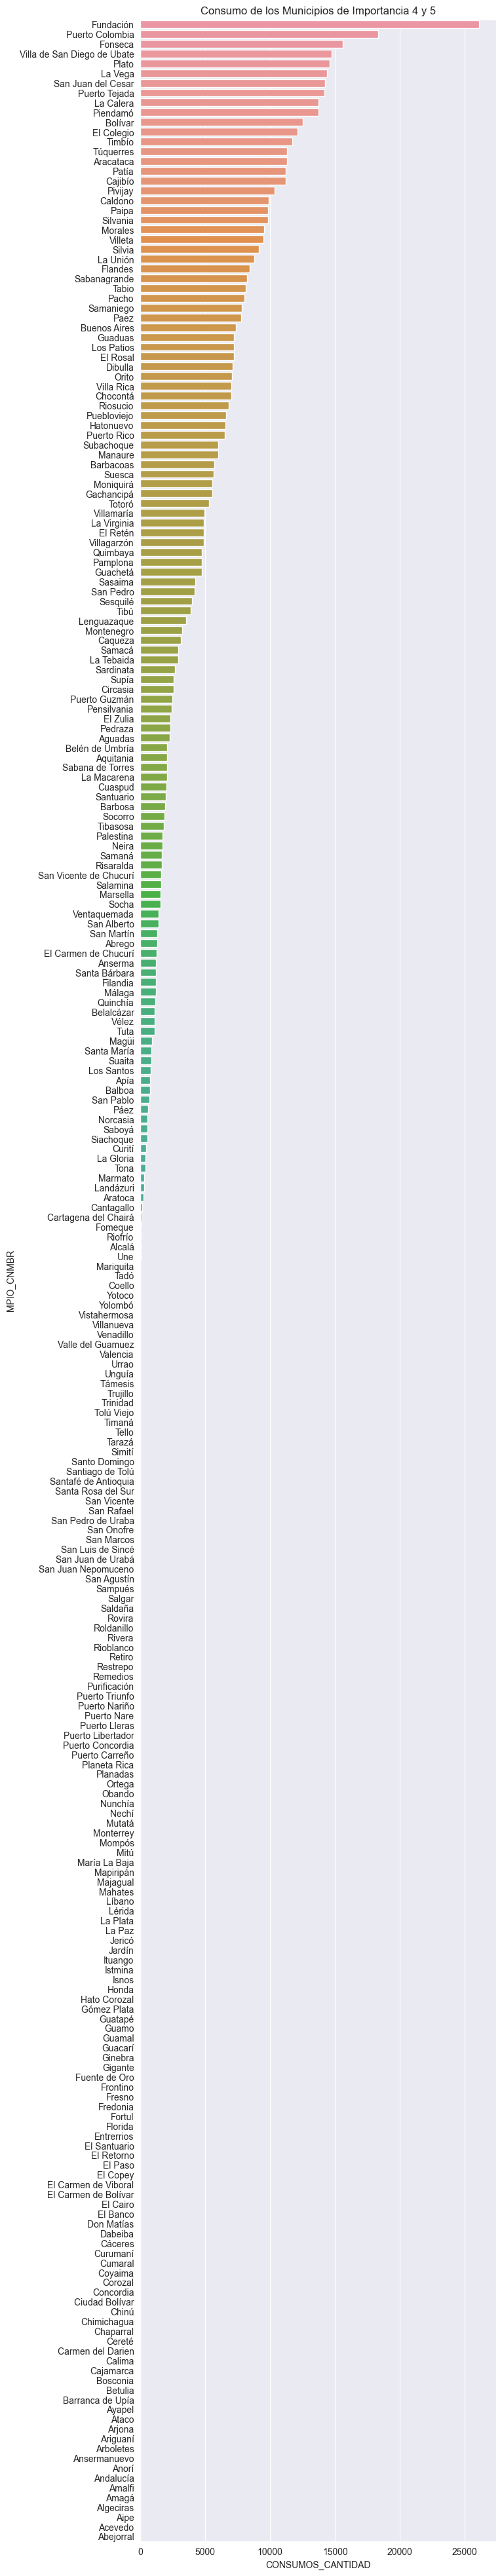

In [21]:
df4_5=df3[["MPIO_CNMBR","CONSUMOS_CANTIDAD"]]
df4_5=df4_5.groupby(["MPIO_CNMBR"]).sum().reset_index()
df4_5.sort_values(["CONSUMOS_CANTIDAD", "MPIO_CNMBR"], ascending=False, inplace=True)

fig = plt.figure(figsize =(7, 50))
sns.set_style("darkgrid")
sns.barplot(y = 'MPIO_CNMBR', x = 'CONSUMOS_CANTIDAD', data = df4_5, orient="h").set(title="Consumo de los Municipios de Importancia 4 y 5");

## Gráfico de Consumo de los Municipios de Importancia 6 y 7 

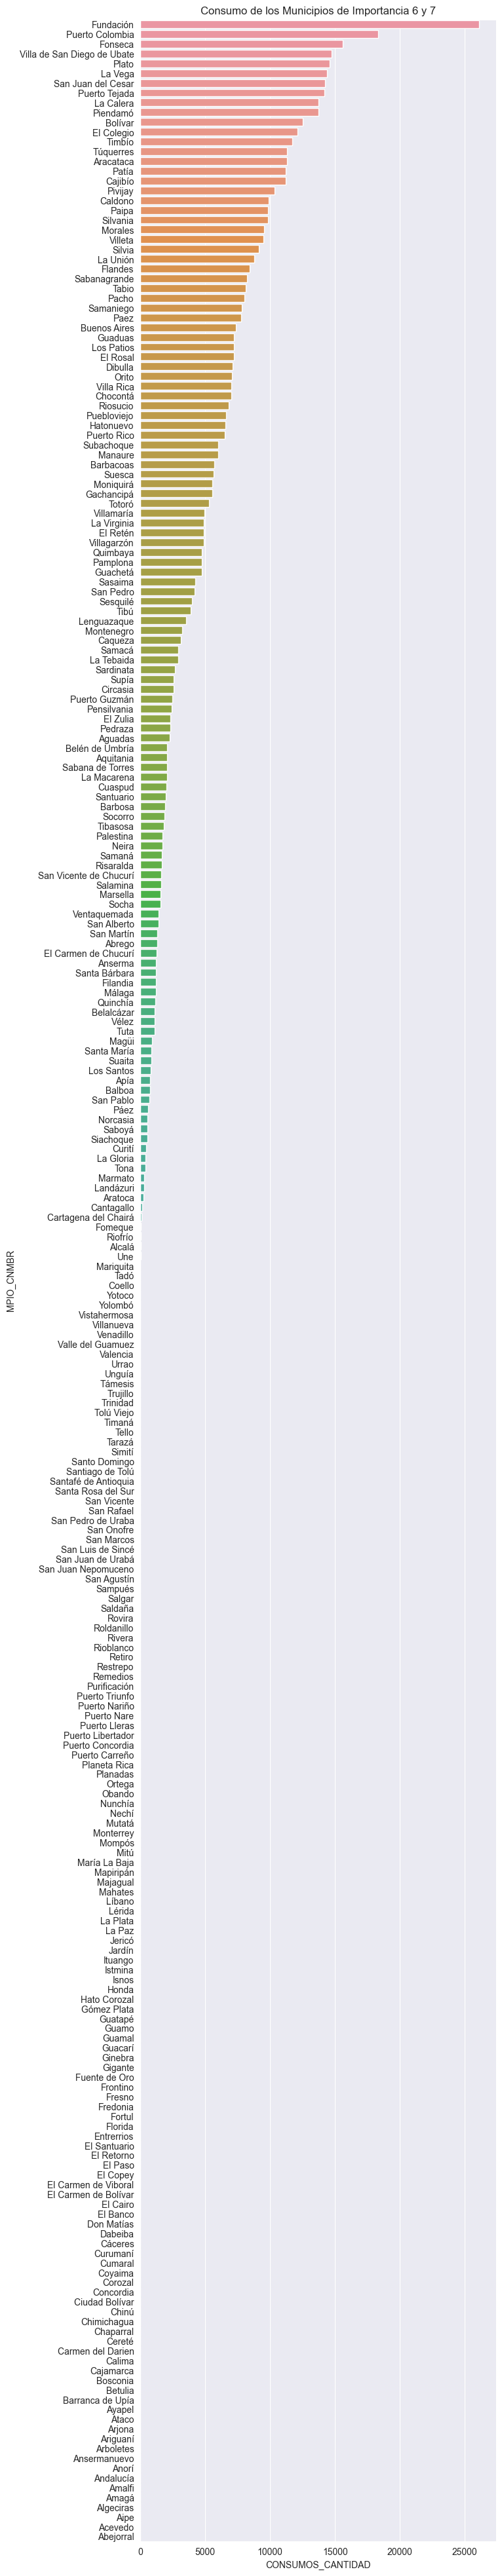

In [23]:
df6_7=df3[["MPIO_CNMBR","CONSUMOS_CANTIDAD"]]
df6_7=df6_7.groupby(["MPIO_CNMBR"]).sum().reset_index()
df6_7.sort_values(["CONSUMOS_CANTIDAD", "MPIO_CNMBR"], ascending=False, inplace=True)

fig = plt.figure(figsize =(7, 50))
sns.set_style("darkgrid")
sns.barplot(y = 'MPIO_CNMBR', x = 'CONSUMOS_CANTIDAD', data = df6_7, orient="h").set(title="Consumo de los Municipios de Importancia 6 y 7");

## Gráfico de Consumo per Capita Municipios de Importancia 1

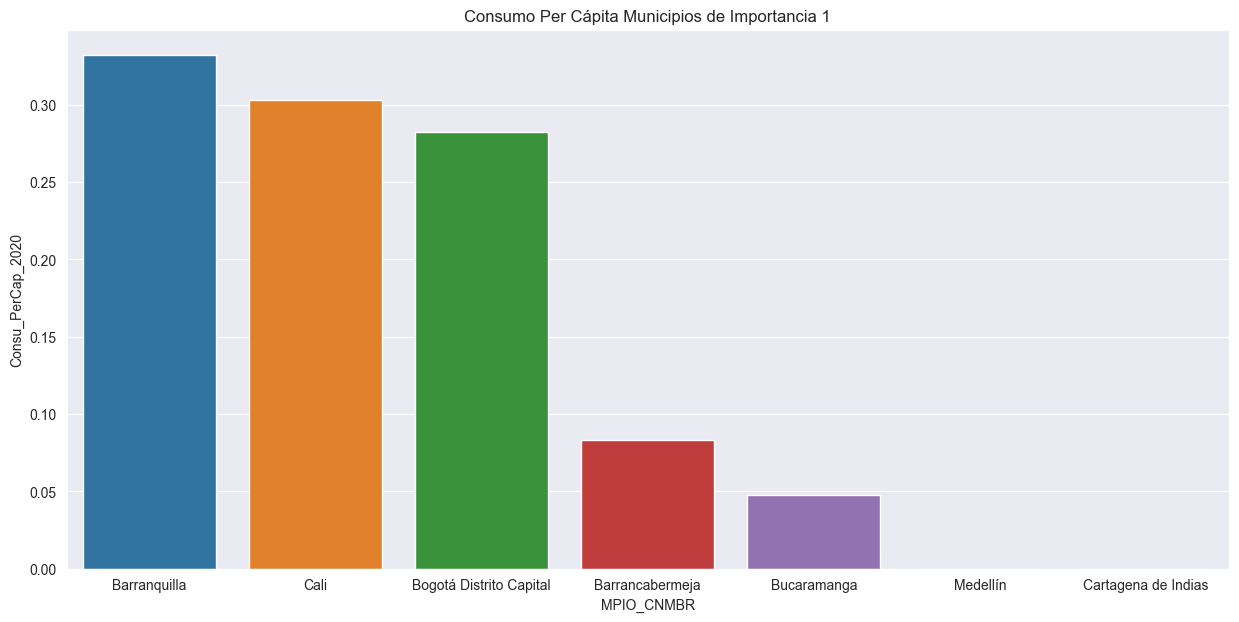

In [27]:
df1_1=df1[["MPIO_CNMBR","Consu_PerCap_2020"]]
df1_1=df1_1.groupby(["MPIO_CNMBR"]).sum().reset_index()
df1_1.sort_values(["Consu_PerCap_2020", "MPIO_CNMBR"], ascending=False, inplace=True)

fig = plt.figure(figsize =(15, 7))
sns.set_style("darkgrid")
sns.barplot(x = 'MPIO_CNMBR', y = 'Consu_PerCap_2020', data = df1_1).set(title="Consumo Per Cápita Municipios de Importancia 1");

## Gráfico de Consumo Per Capita Municipios de Importancia 2 y 3

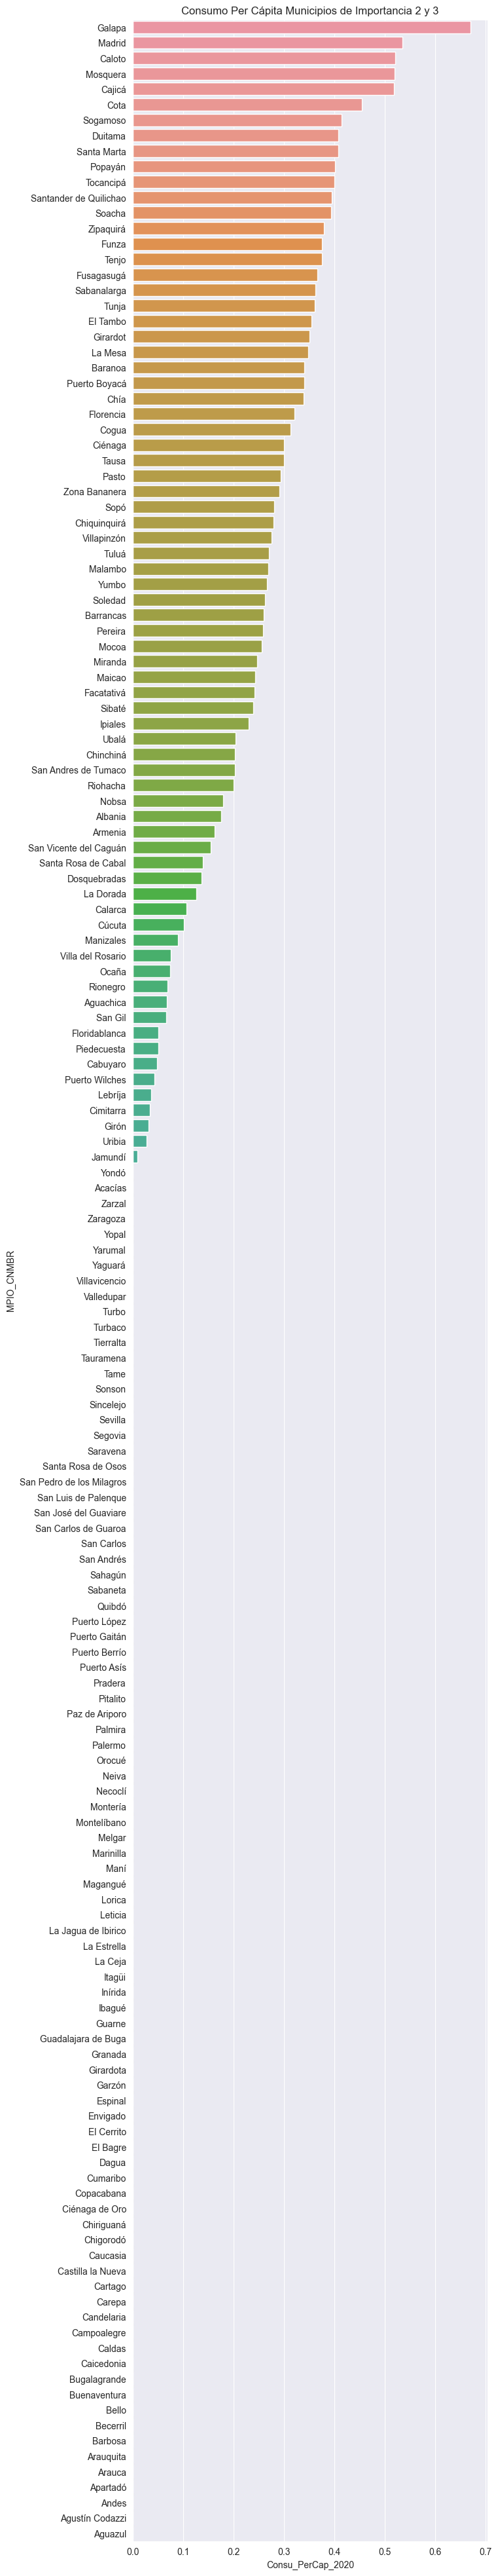

In [29]:
df2_3=df2[["MPIO_CNMBR","Consu_PerCap_2020"]]
df2_3=df2_3.groupby(["MPIO_CNMBR"]).sum().reset_index()
df2_3.sort_values(["Consu_PerCap_2020", "MPIO_CNMBR"], ascending=False, inplace=True)

fig = plt.figure(figsize =(7, 50))
sns.set_style("darkgrid")
sns.barplot(y = 'MPIO_CNMBR', x = 'Consu_PerCap_2020', data = df2_3, orient="h").set(title="Consumo Per Cápita Municipios de Importancia 2 y 3");

## Gráfico de Consumo per Capita Municipios de Importancia 4 y 5

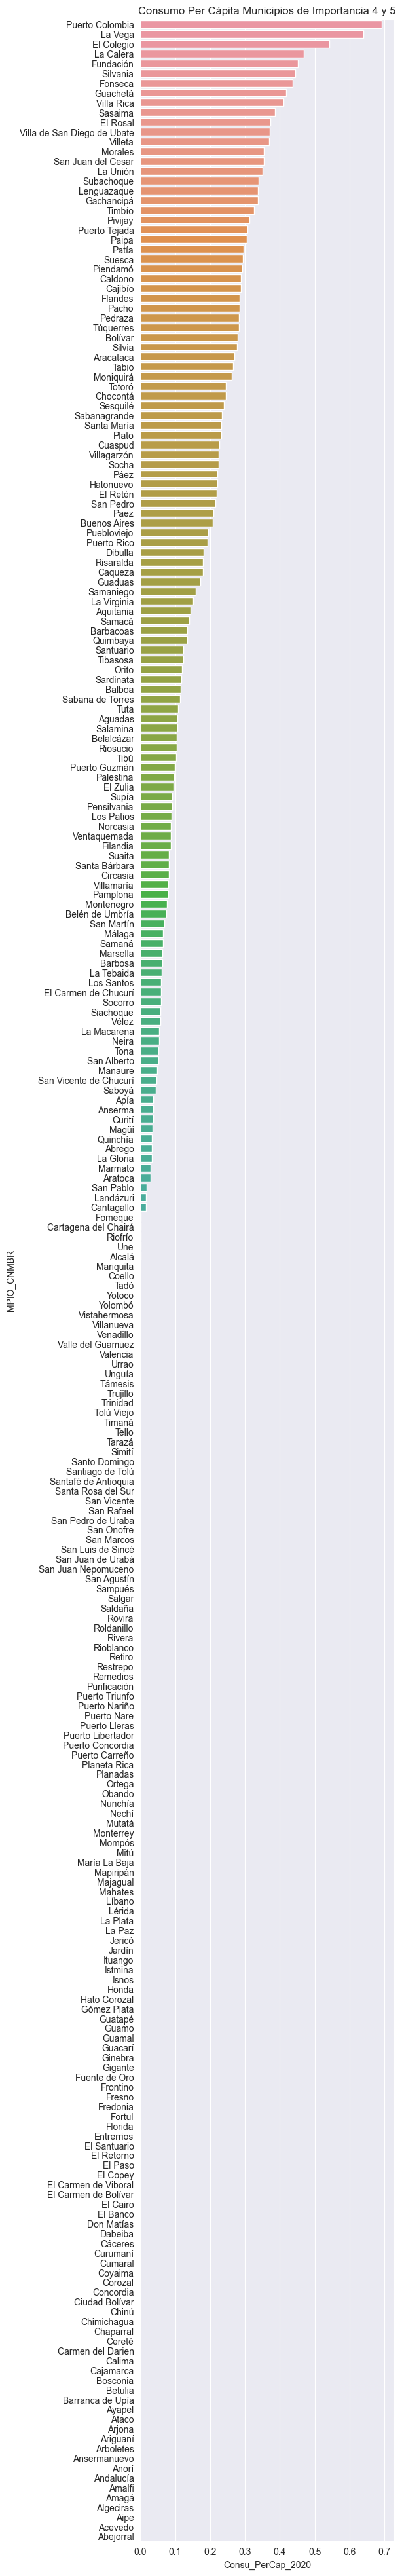

In [30]:
df4_5=df3[["MPIO_CNMBR","Consu_PerCap_2020"]]
df4_5=df4_5.groupby(["MPIO_CNMBR"]).sum().reset_index()
df4_5.sort_values(["Consu_PerCap_2020", "MPIO_CNMBR"], ascending=False, inplace=True)

fig = plt.figure(figsize =(5, 50))
sns.set_style("darkgrid")
sns.barplot(y = 'MPIO_CNMBR', x = 'Consu_PerCap_2020', data = df4_5, orient="h").set(title="Consumo Per Cápita Municipios de Importancia 4 y 5");

## Gráfico de Consumo per Capita Municipios de Importancia 6 y 7

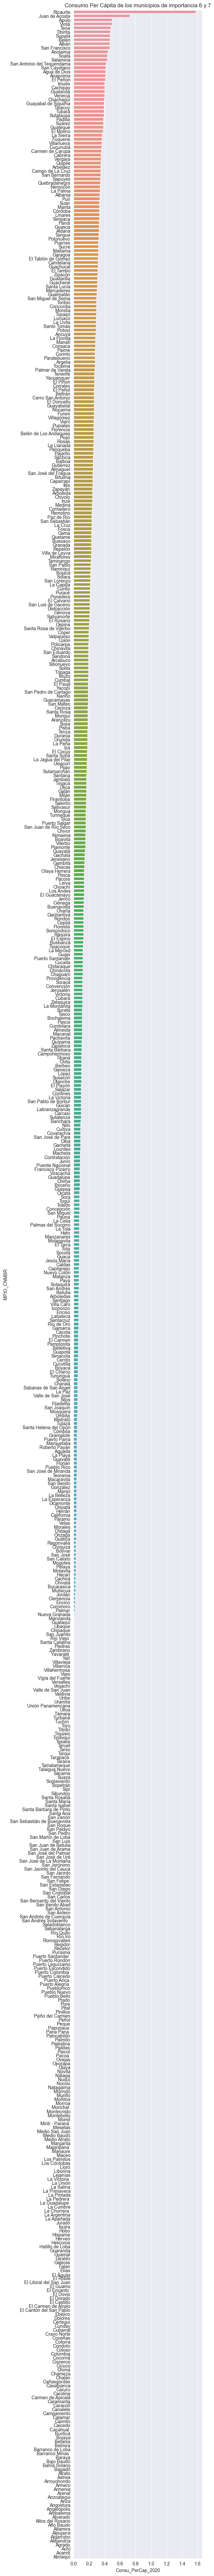

In [32]:
df6_7=df4[["MPIO_CNMBR","Consu_PerCap_2020"]]
df6_7=df6_7.groupby(["MPIO_CNMBR"]).sum().reset_index()
df6_7.sort_values(["Consu_PerCap_2020", "MPIO_CNMBR"], ascending=False, inplace=True)

fig = plt.figure(figsize =(5, 100))
sns.set_style("darkgrid")
sns.barplot(y = 'MPIO_CNMBR', x = 'Consu_PerCap_2020', data = df6_7, orient="h").set(title="Consumo Per Cápita de los municipios de importancia 6 y 7");

No se filtraron los vacíos por que nos da información sobre los datos:
 1) Antioquia no presento datos en la plataforma de XM
 2) municipios de importancia 1 como Cartagena y Medellín no presentaron datos 


en base a eso se construyó un aplicativo para la visualización enriquecido con datos geolocalización del país.

